<a href="https://colab.research.google.com/github/ihyaulumuddin044/Pengantar_ML/blob/main/modules/Exploratory_Data_Analysis/Exploratory_Data_Analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [6]:
# Membaca dataset wine
dataset = pd.read_csv('wine.csv')

# Menampilkan 5 baris pertama
dataset.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# infomasi mengenai dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
# statistik descriptif
dataset.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
# mengecek jika ada data yang hilang
print(dataset.isnull().sum())

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


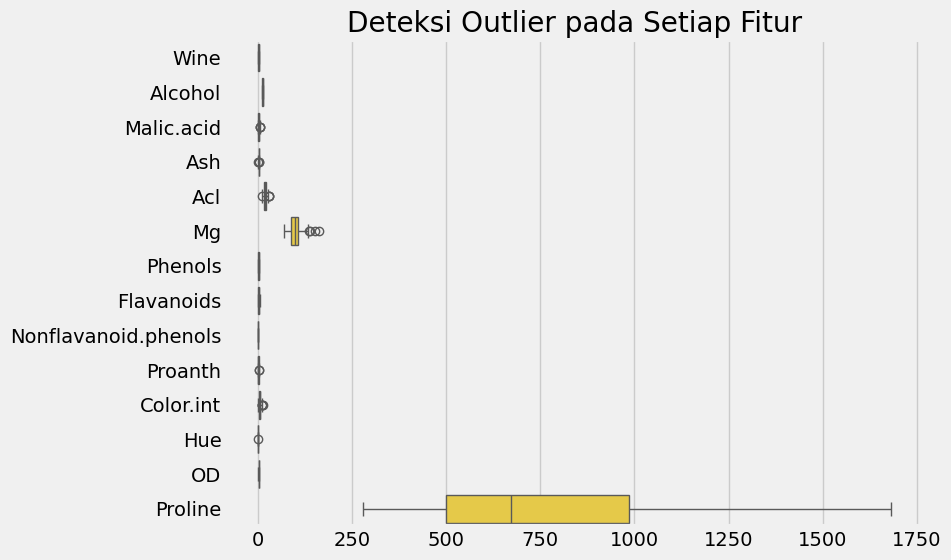

In [10]:
# deteksi Outlier dengan box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, orient="h", palette="Set2")
plt.title("Deteksi Outlier pada Setiap Fitur")
plt.show()

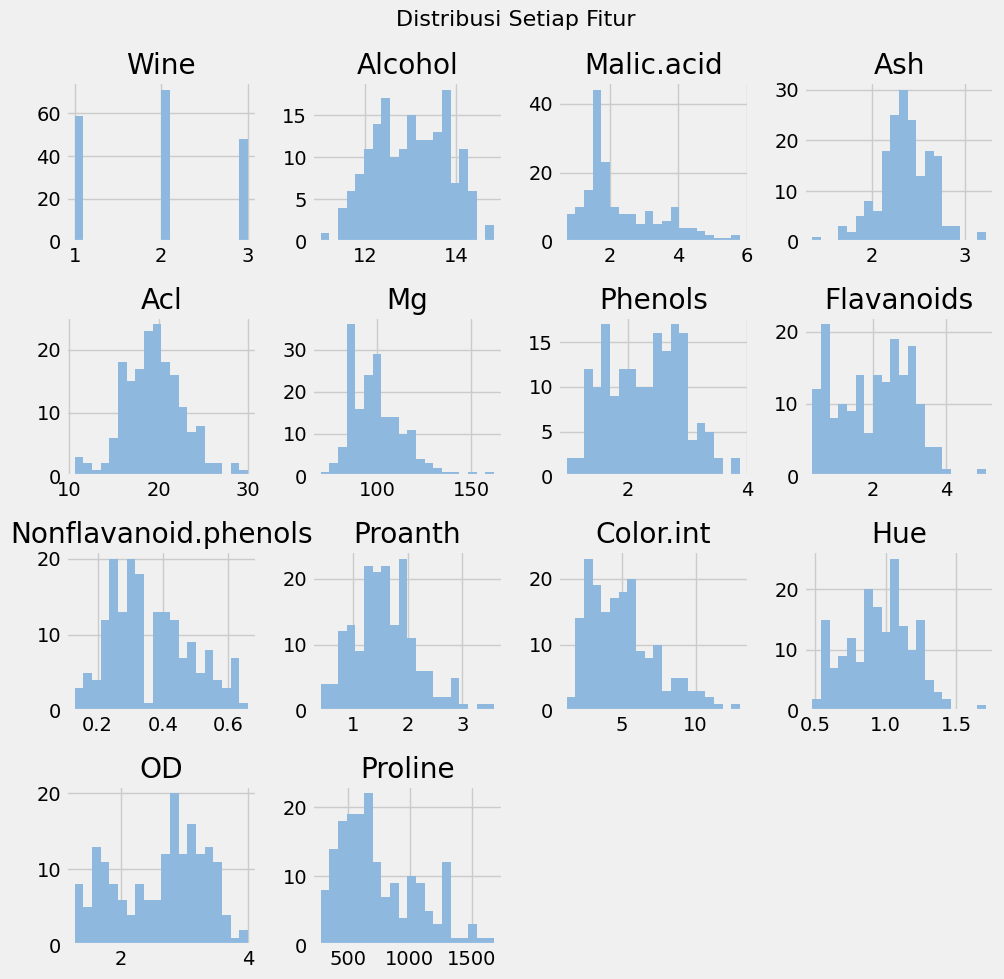

In [11]:
dataset.hist(figsize=(10, 10), bins=20, color="#8fb8de")
plt.suptitle("Distribusi Setiap Fitur", fontsize=16)
plt.tight_layout()
plt.show()

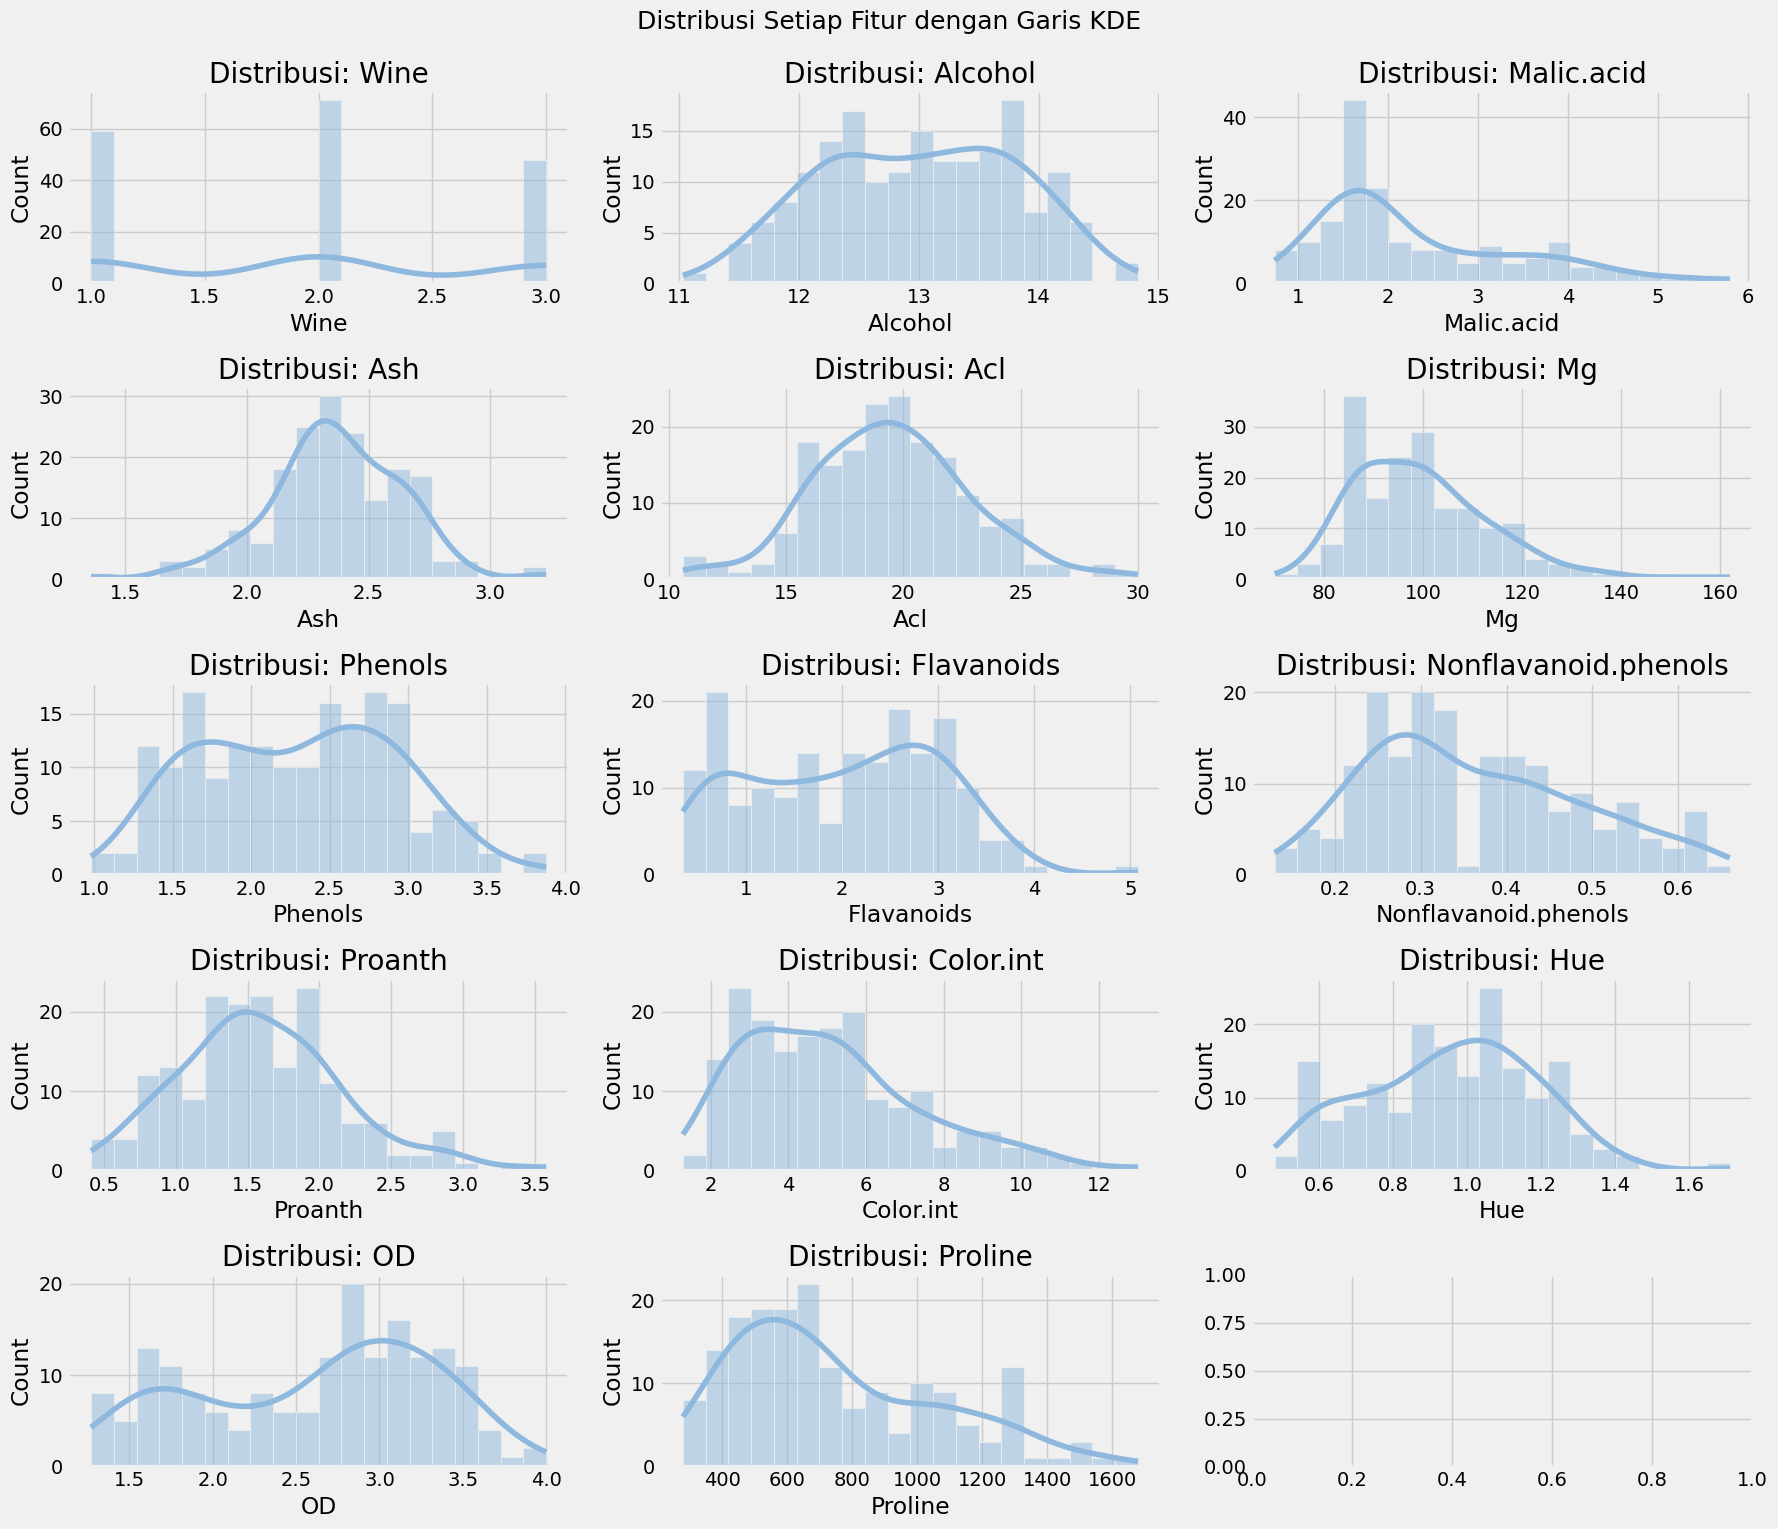

In [12]:
# Membuat subplot grid
# Meningkatkan nrows menjadi 5 untuk menampung 14 kolom numerik (5*3=15 axes)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 15)) # Menyesuaikan figsize juga
axes = axes.ravel()  # Mengubah ke 1D array agar mudah diiterasi

# Ambil semua kolom numerik
num_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Loop dan plot
# Loop sekarang akan berjalan hingga idx=13, dan akan ada axes[13] yang tersedia
for idx, col in enumerate(num_cols):
    sns.histplot(data=dataset, x=col, kde=True, ax=axes[idx], color="#8fb8de", bins=20)
    axes[idx].set_title(f'Distribusi: {col}')

# Supaya rapi
# Menyesuaikan tight_layout untuk tata letak yang lebih baik dengan lebih banyak subplot
plt.tight_layout()
plt.suptitle("Distribusi Setiap Fitur dengan Garis KDE", fontsize=18, y=1.02)
plt.show()

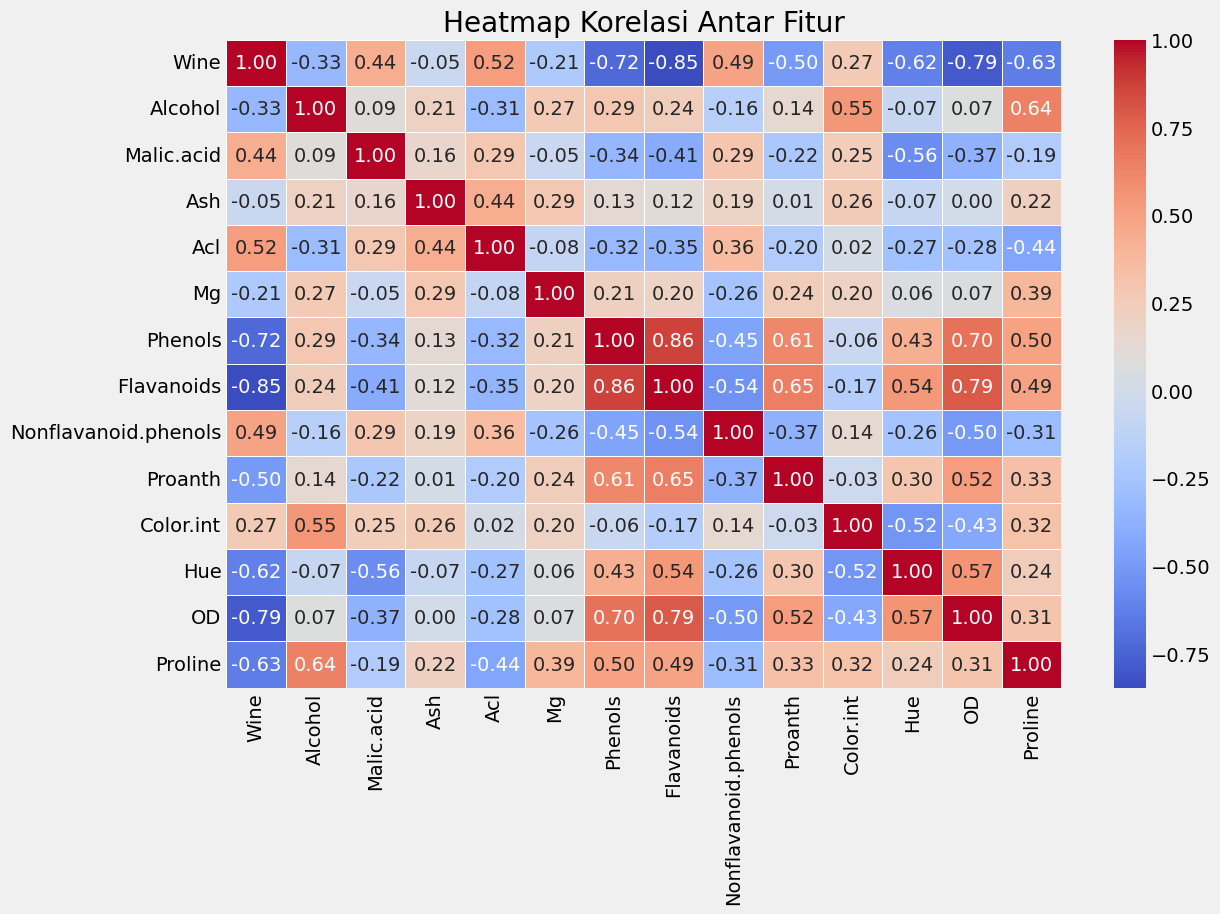

In [13]:
# menghitung korelasi Pearson antar fitur numerik
correlation_matrix = dataset.corr(numeric_only=True)

# heatmap korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

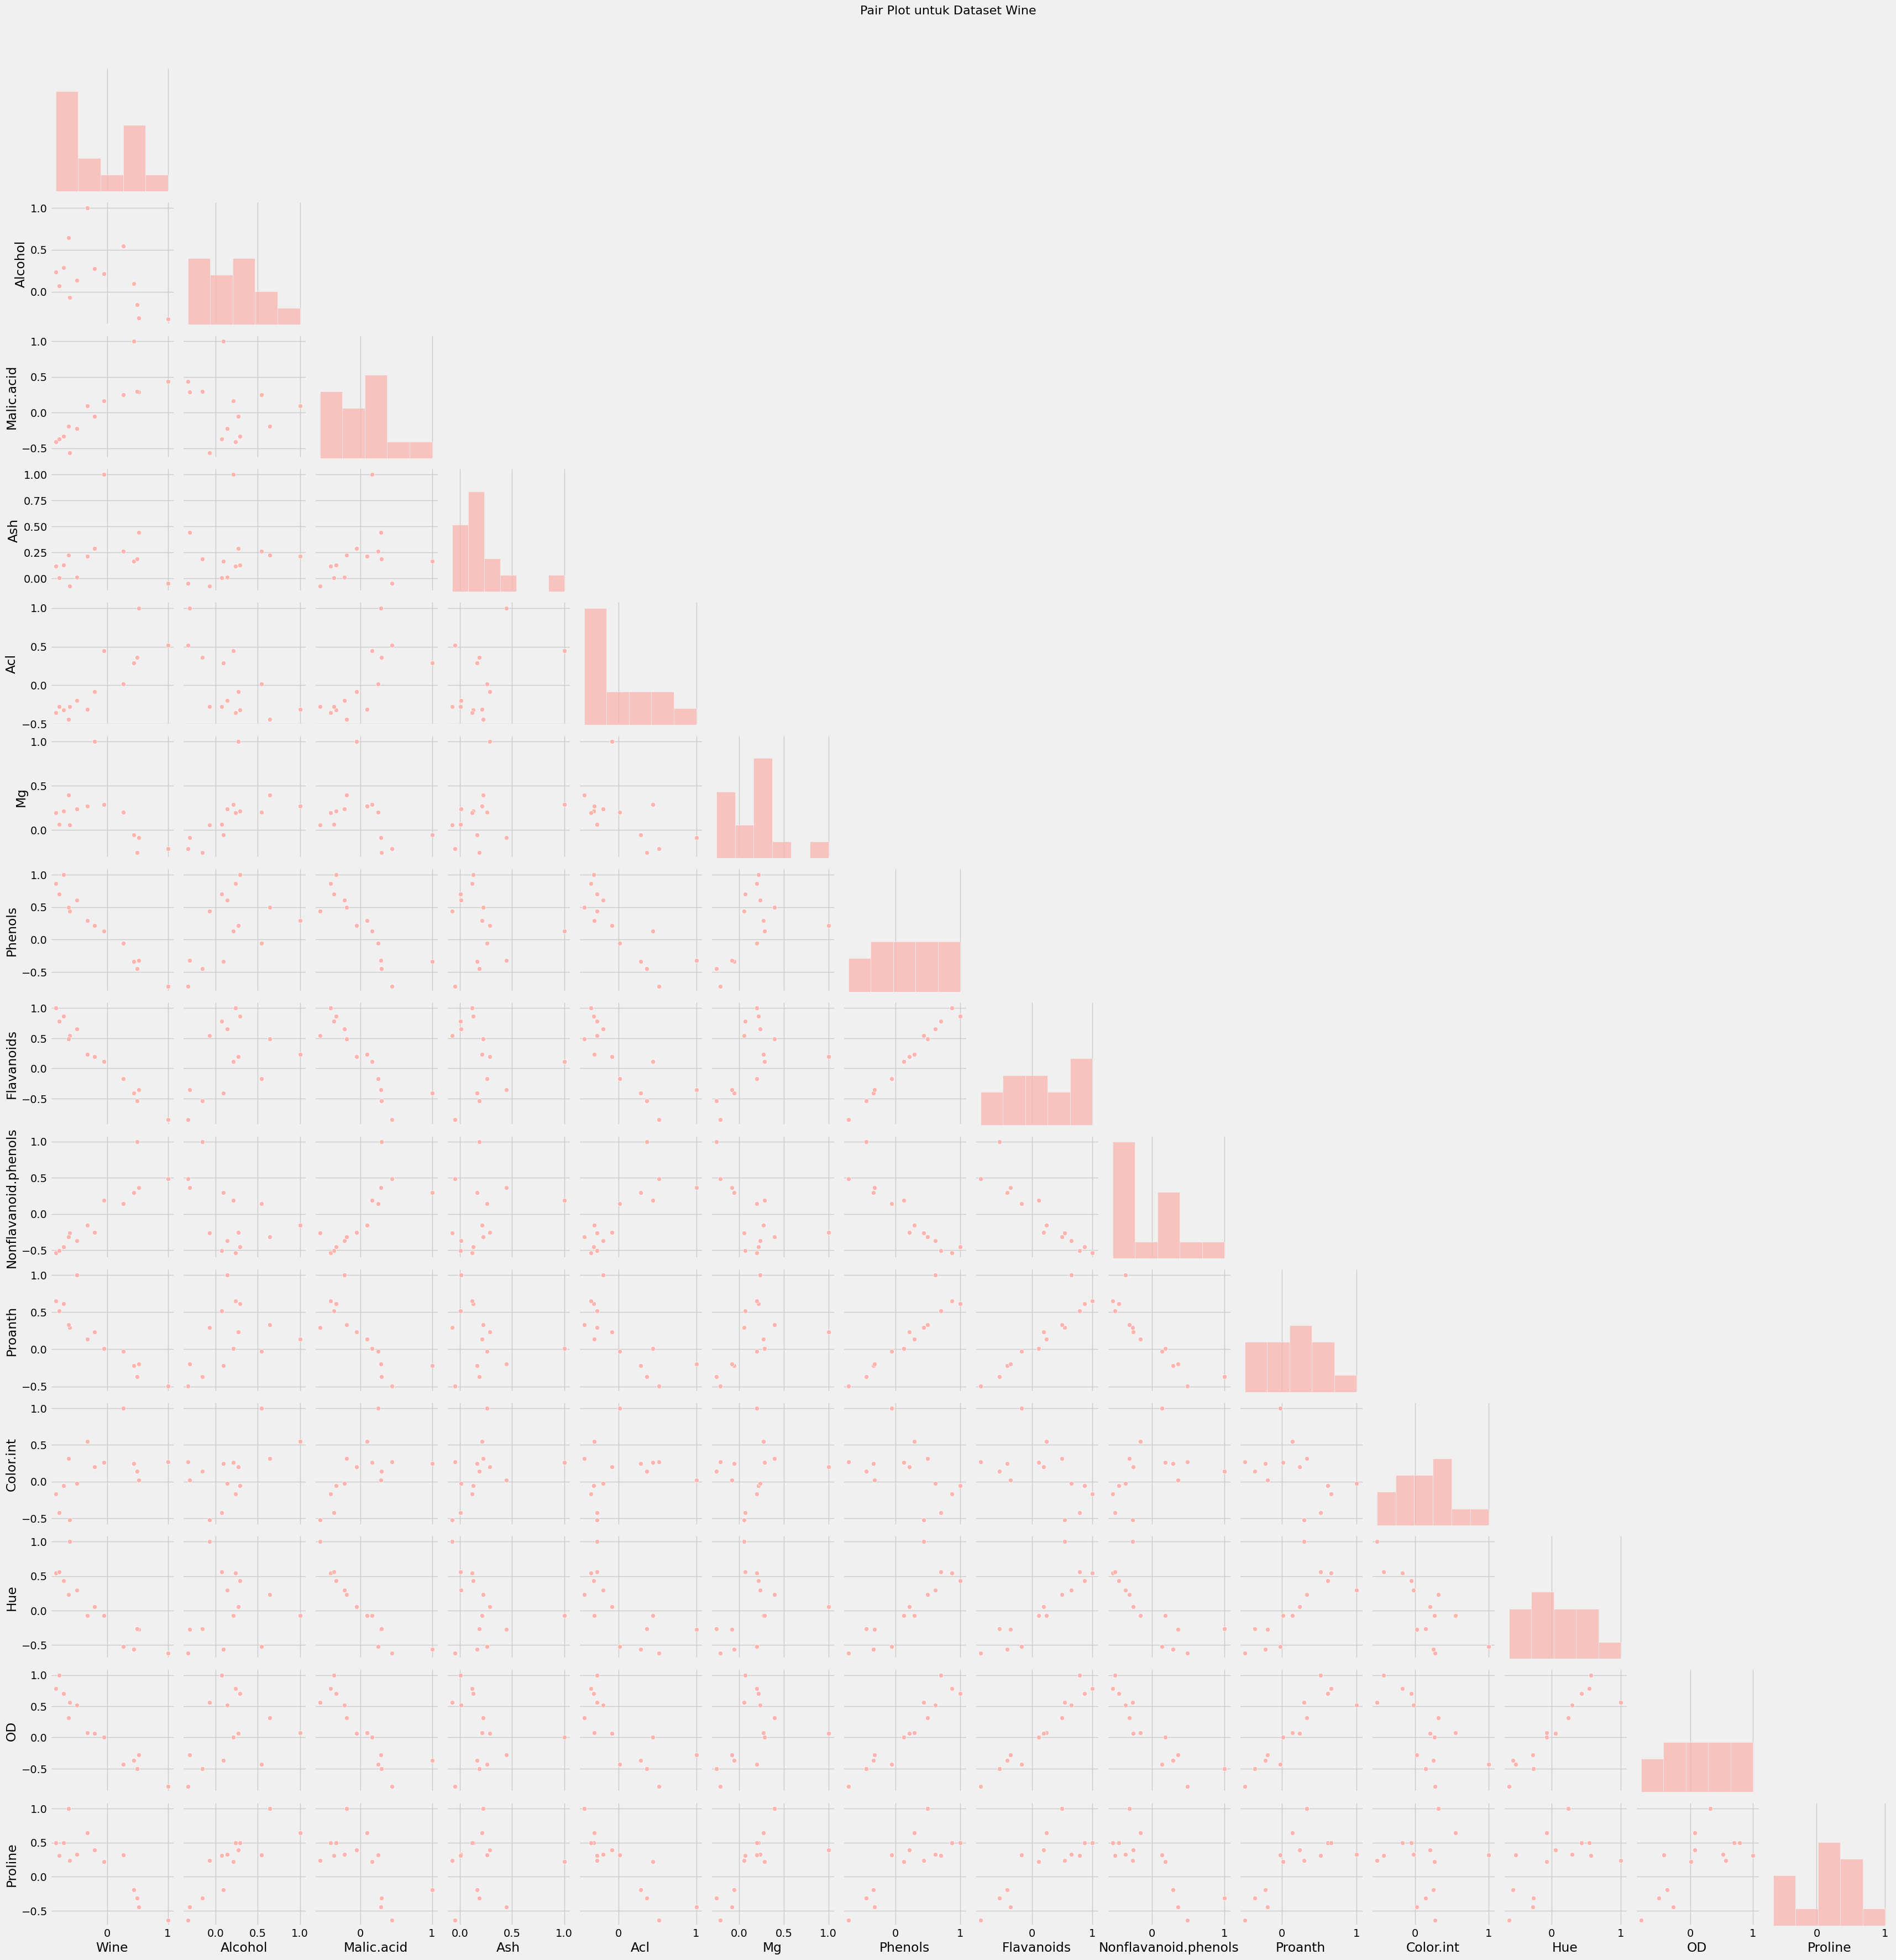

In [14]:
sns.set_palette("Pastel1")

# Membuat pairplot
pair = sns.pairplot(correlation_matrix, corner=True)  # corner=True agar tidak duplikat segitiga atas
pair.fig.suptitle('Pair Plot untuk Dataset Wine', fontsize=16, y=1.02)
plt.show()